In [0]:
 class MyLinearRegression:
    def __init__(self, weight= 30 , bias= 5, learning_rate= 0.0008,
                 iterations= 100): #hyper parameters, Lr=0-1
        self.weight = weight
        self.bias = bias
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.it = []
        self.cost_trend = []
        self.cost = 0

    def predict(self, x):
        predicted_set = []
        for i in range(len(x)):
            predicted_value = self.weight * x[i] + self.bias
            predicted_set.append(predicted_value)
        return predicted_set

    def cost_function(self, x, y):
        count = len(x)
        total_error = 0.0
        for i in range(count):
            total_error += (y[i] - (self.weight * x[i] +
                            self.bias)) ** 2
        return float(total_error) / (2 * count)

    def update_weights(self, x, y):
        weight_deriv = 0
        bias_deriv = 0
        count = len(x)

        for i in range(count):
            # Calculate partial derivatives
            # -2x(y - (mx + b))
            weight_deriv += -2 * x[i] * (y[i] -(self.weight * x[i] + self.bias))

            # -2(y - (mx + b))
            bias_deriv += -2 * (y[i] - (self.weight * x[i] +
                                self.bias))

        # We subtract because the derivatives point in direction of steepest
        # ascent
        self.weight -= (weight_deriv / count) * self.learning_rate
        self.bias -= (bias_deriv / count) * self.learning_rate

    def train(self, x, y):
        for i in range(self.iterations):
            self.update_weights(x, y)
            # Calculating cost
            self.cost = self.cost_function(x, y)
            self.cost_trend.append(self.cost)
            self.it.append(i)
           # if i % 10000 == 0:
            print("Iteration: {}\t Weight: {}\t Bias: {}\t Cost: {}".format(i, self.weight, self.bias, self.cost))

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# intialise data of lists. 
data = {'Hours':[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8], #attribute
        'Scores':[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]} #output
  
# Create DataFrame 
studentscores = pd.DataFrame(data) 
  
# Print the output. 
studentscores 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


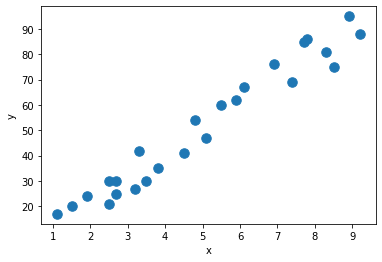

In [5]:
x=[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8] #hours
y=[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86] #score
plt.scatter(x,y,s=90)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [6]:

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


#spliting the coloumn
X = studentscores.iloc[:, :-1].values #all the rows except last coloumn 
y = studentscores.iloc[:, -1].values # all the rows only with last coloumn
X,y

(array([[2.5],
        [5.1],
        [3.2],
        [8.5],
        [3.5],
        [1.5],
        [9.2],
        [5.5],
        [8.3],
        [2.7],
        [7.7],
        [5.9],
        [4.5],
        [3.3],
        [1.1],
        [8.9],
        [2.5],
        [1.9],
        [6.1],
        [7.4],
        [2.7],
        [4.8],
        [3.8],
        [6.9],
        [7.8]]),
 array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
        24, 67, 69, 30, 54, 35, 76, 86]))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fitting Simple Linear Regression to the Training set
regressor = MyLinearRegression()
regressor.train(X_train, y_train)
print('Weight: ' + str(regressor.weight) + ' Bias: ' + str(regressor.bias))

# Predicting the Test set results
y_pred = regressor.predict(X_test)

Iteration: 0	 Weight: [28.89384]	 Bias: [4.8268]	 Cost: 6359.329634243981
Iteration: 1	 Weight: [27.84866299]	 Bias: [4.66315117]	 Cost: 5679.126225472339
Iteration: 2	 Weight: [26.86110692]	 Bias: [4.50852693]	 Cost: 5071.855597362874
Iteration: 3	 Weight: [25.92799512]	 Bias: [4.36242977]	 Cost: 4529.697750137533
Iteration: 4	 Weight: [25.04632604]	 Bias: [4.22438957]	 Cost: 4045.671160159904
Iteration: 5	 Weight: [24.2132636]	 Bias: [4.09396215]	 Cost: 3613.5428768329175
Iteration: 6	 Weight: [23.42612809]	 Bias: [3.97072781]	 Cost: 3227.7482590884133
Iteration: 7	 Weight: [22.68238752]	 Bias: [3.85428999]	 Cost: 2883.3193178921074
Iteration: 8	 Weight: [21.97964949]	 Bias: [3.74427399]	 Cost: 2575.820742009649
Iteration: 9	 Weight: [21.31565351]	 Bias: [3.64032577]	 Cost: 2301.2927832190026
Iteration: 10	 Weight: [20.68826371]	 Bias: [3.54211081]	 Cost: 2056.20026548552
Iteration: 11	 Weight: [20.09546195]	 Bias: [3.44931303]	 Cost: 1837.3870614760515
Iteration: 12	 Weight: [19.535

In [8]:
regressor.it
regressor.cost_trend

[6359.329634243981,
 5679.126225472339,
 5071.855597362874,
 4529.697750137533,
 4045.671160159904,
 3613.5428768329175,
 3227.7482590884133,
 2883.3193178921074,
 2575.820742009649,
 2301.2927832190026,
 2056.20026548552,
 1837.3870614760515,
 1642.0354501929937,
 1467.6298323647475,
 1311.9243363451699,
 1172.9138973737895,
 1048.8084377760447,
 938.0098156145132,
 839.0912449522253,
 750.7789227168314,
 671.9356255694416,
 601.5460655502504,
 538.7038159213658,
 482.5996388471279,
 432.51106460407163,
 387.79308812901303,
 347.8698631019991,
 312.22728660643196,
 280.40637887688547,
 251.99737288370412,
 226.63443764425983,
 203.99096731141228,
 183.7753753754025,
 165.72733981989853,
 149.61445087997998,
 135.22921823426853,
 122.38639909195328,
 110.9206127677113,
 100.68421102671448,
 91.54537677553783,
 83.386426615262,
 76.10229539825477,
 69.5991832738283,
 63.793347800390066,
 58.610025569763465,
 53.98246945712255,
 49.851089098930146,
 46.16268353056426,
 42.86975610208501,

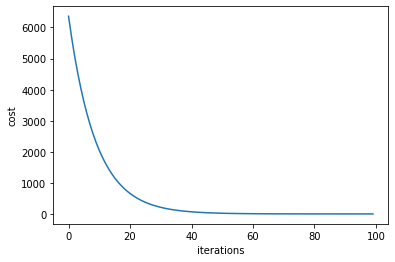

In [9]:
iterations= regressor.it
cost = regressor.cost_trend
plt.plot(iterations,cost)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()